## Market Data Storage and Analysis for investors : ##

Exploratory Data Analysis (EDA) :

1. Objective :
*Investors often struggle with fragmented and unstructured market data, making it difficult to analyze trends, identify opportunities, and make informed investment decisions. This project aims to develop a structured Market Data Storage and Analysis system that organizes, processes, and visualizes financial data to help investors gain insights, track performance, and optimize their investment strategies.*

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.Data Collection :
import all dataset in Pandas.

In [2]:
df1=pd.read_csv("company_data.csv")
df2=pd.read_csv("company_performance_data.csv")
df3=pd.read_csv("financial_transaction_data.csv")
df4=pd.read_csv("stock_price_data.csv")
df5=pd.read_csv("trading_volume_data.csv")

3.Data Cleaning:
Cleaning the dataset.

Check data types

In [3]:
df2.info()  #df2,df3,df4,df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   performance_id  3000 non-null   int64  
 1   company_id      3000 non-null   int64  
 2   date            3000 non-null   object 
 3   revenue         3000 non-null   float64
 4   profit          3000 non-null   float64
 5   eps             3000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 140.8+ KB


Check null values

In [4]:
df1.isnull().sum()  #df2,df3,df4,df5

company_id      0
company_name    0
industry        0
country         0
founded_year    0
market_cap      0
dtype: int64

Check duplicate values

In [5]:
df3.duplicated().sum() #df1,df2,df4,df5

np.int64(0)

In [6]:

df1 = df1.drop_duplicates(subset=['company_id'])
df1["company_id"].duplicated().sum()
df2 = df2.drop_duplicates(subset=['performance_id'])
df2["performance_id"].duplicated().sum()
df4 = df4.drop_duplicates(subset=['price_id'])
df4["price_id"].duplicated().sum()
df5 = df5.drop_duplicates(subset=['volume_id'])
df5["volume_id"].duplicated().sum()

np.int64(0)

4.Data Exploration

In [7]:
df1

,company_id,company_name,industry,country,founded_year,market_cap
0,4699,Castaneda-Sanchez,Healthcare,Ukraine,1956,312.54
1,7917,Mack and Sons,Retail,Denmark,1903,277.19
2,2991,"Mendez, Carlson and Johnson",Technology,Malta,1942,190.07
3,5592,Jones-Walker,Retail,Afghanistan,1921,208.63
4,6452,Williamson-Williams,Technology,Comoros,1959,160.38
...,...,...,...,...,...,...
495,4086,"York, Howe and Dunn",Retail,Czech Republic,1954,157.86
496,1977,Moore and Sons,Technology,Philippines,1913,226.38
497,5319,Cox-Rhodes,Telecom,Yemen,1987,68.37
498,1869,Jennings-Knox,Healthcare,Eritrea,1966,116.95


In [8]:
df2.head()     #df1,df2,df3,df4,df5

,performance_id,company_id,date,revenue,profit,eps
0,361483,1448,2021-09-29,33115.27,7036.71,35.33
1,423408,1103,2021-10-11,25562.17,-1151.80,0.69
2,426242,7567,2024-03-14,49649.73,-2469.35,36.62
3,204917,9672,2024-06-13,34951.97,6859.55,16.49
4,229534,3934,2023-01-20,44899.11,12509.20,48.64


In [9]:
df1.tail()

,company_id,company_name,industry,country,founded_year,market_cap
495,4086,"York, Howe and Dunn",Retail,Czech Republic,1954,157.86
496,1977,Moore and Sons,Technology,Philippines,1913,226.38
497,5319,Cox-Rhodes,Telecom,Yemen,1987,68.37
498,1869,Jennings-Knox,Healthcare,Eritrea,1966,116.95
499,2408,"West, George and Vazquez",Healthcare,Costa Rica,1977,150.32


In [10]:
df1.shape

(487, 6)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    487 non-null    int64  
 1   company_name  487 non-null    object 
 2   industry      487 non-null    object 
 3   country       487 non-null    object 
 4   founded_year  487 non-null    int64  
 5   market_cap    487 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.6+ KB


In [12]:
df1.describe()

,company_id,founded_year,market_cap
count,487.000000,487.000000,487.000000
mean,5418.644764,1962.034908,250.077906
std,2652.377451,32.748839,148.777019
min,1008.000000,1900.000000,2.480000
25%,3026.500000,1935.000000,120.140000
50%,5382.000000,1964.000000,252.180000
75%,7675.000000,1990.000000,384.565000
max,9981.000000,2020.000000,499.460000


In [13]:
df1.columns

Index(['company_id', 'company_name', 'industry', 'country', 'founded_year',
       'market_cap'],
      dtype='object')

5.Data Visualization

Basic visualization 

In [14]:
T = pd.merge(df1, df2, on="company_id")
T["date"] = pd.to_datetime(T["date"])
T["year"] = T["date"].dt.year

<Axes: xlabel='buy_volume', ylabel='sell_volume'>

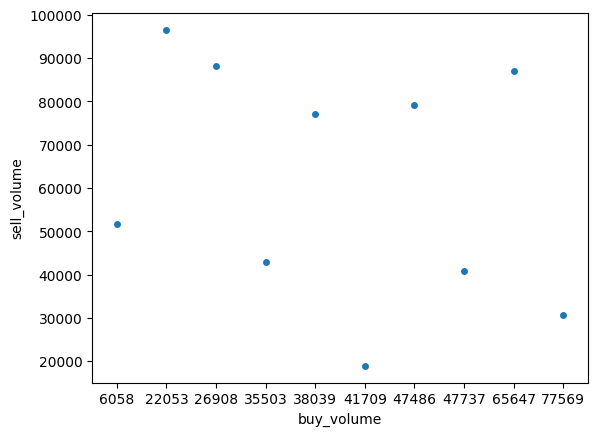

In [15]:
df=df5.head(10)
sns.stripplot(data=df,x="buy_volume",y="sell_volume")

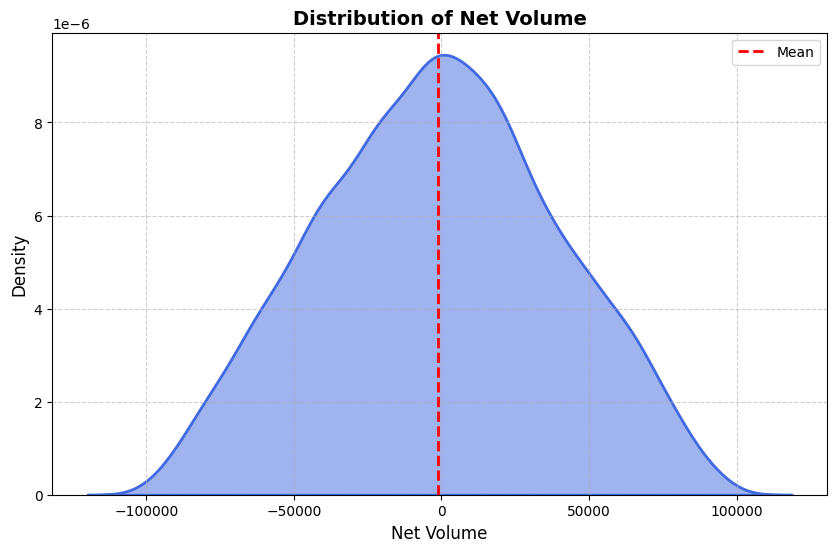

In [ ]:
plt.figure(figsize=(10, 6))
# Advanced KDE Plot with Styling
sns.kdeplot(data=df5,x="net_volume",fill=True,alpha=0.5,color="royalblue",linewidth=2)
# Grid and Aesthetic Enhancements
plt.grid(True, linestyle="--", alpha=0.6)
plt.axvline(df5["net_volume"].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")
# Titles and Labels
plt.title("Distribution of Net Volume", fontsize=14, fontweight="bold")
plt.xlabel("Net Volume", fontsize=12)
plt.ylabel("Density", fontsize=12)
# Legend
plt.legend()
plt.show()

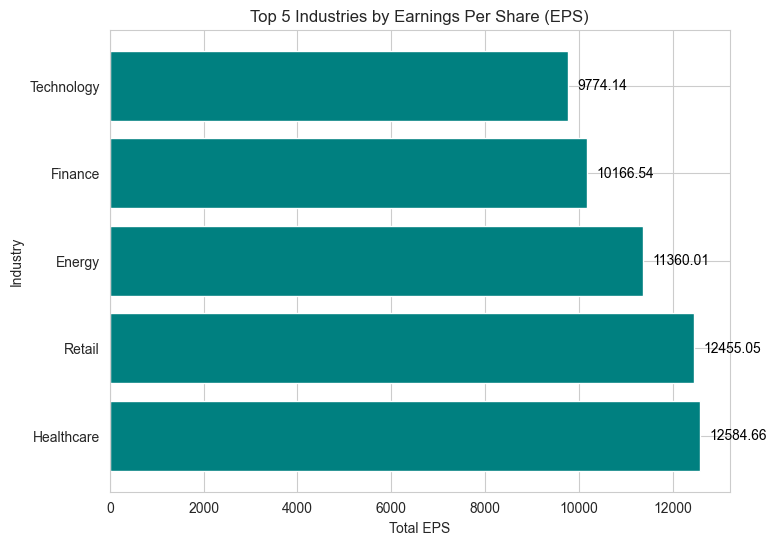

In [ ]:
# from PIL import Image

# Data for the chart
industries = ["Healthcare", "Retail", "Energy", "Finance", "Technology"]
eps_values = [12584.66, 12455.05, 11360.01, 10166.54, 9774.14]

# Set style
sns.set_style("whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot horizontal bar chart
ax.barh(industries, eps_values, color="teal")

# Add labels and title
ax.set_xlabel("Total EPS")
ax.set_ylabel("Industry")
ax.set_title("Top 5 Industries by Earnings Per Share (EPS)")

# Add EPS values on bars
for i, v in enumerate(eps_values):
    ax.text(v + 200, i, str(v), color='black', fontsize=10, va='center')

<Axes: ylabel='industry'>

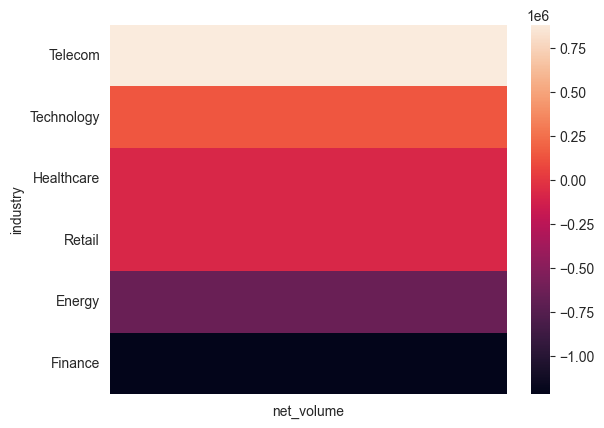

In [18]:
m=pd.merge(df1,df5,on="company_id")                               
m["date"] = pd.to_datetime(m["date"])                                                        
m["year"] = m["date"].dt.year  
m=m.groupby(["industry","year"]).agg({"net_volume":"sum"}).sort_values("net_volume",ascending=False)                                                
mx=m.xs(2022, level="year") 
sns.heatmap(mx)

<Figure size 1200x600 with 0 Axes>

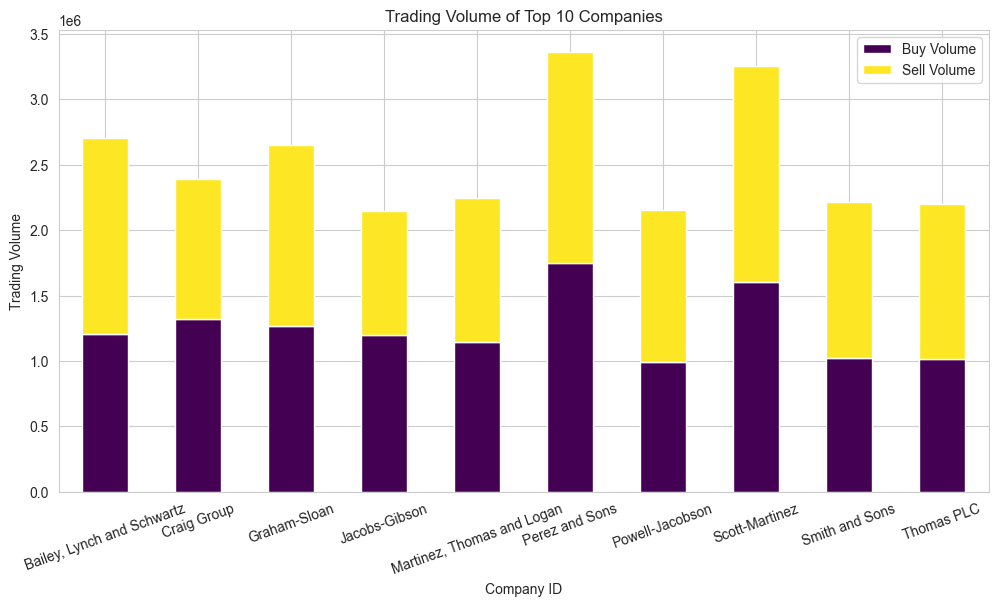

In [19]:
# Load the CSV file (update the file path accordingly)
df =pd.merge(df1,df5,on="company_id") 
# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])
# Aggregate trading volume by company
top_companies = df.groupby("company_name")[["buy_volume", "sell_volume"]].sum()
# Select top 10 companies based on total trading volume (buy + sell)
top_companies["total_volume"] = top_companies["buy_volume"] + top_companies["sell_volume"]
top_companies = top_companies.sort_values("total_volume", ascending=False).head(10)
# Get the top 10 company IDs
top_10_company_ids = top_companies.index.tolist()
# Filter dataset for only these top 10 companies
df_top_10 = df[df["company_name"].isin(top_10_company_ids)]
# Aggregate trading volume for selected companies
top_10_trading = df_top_10.groupby("company_name")[["buy_volume", "sell_volume"]].sum()
top_10_trading 
# plot trading volumes for the selected companies
plt.figure(figsize=(12, 6))
top_10_trading[["buy_volume", "sell_volume"]].plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Trading Volume of Top 10 Companies")
plt.xlabel("Company ID")
plt.ylabel("Trading Volume")
plt.legend(["Buy Volume", "Sell Volume"])
plt.xticks(rotation=20)
plt.savefig("chart.png")
plt.show()                      

COMPANY OVERVIEW


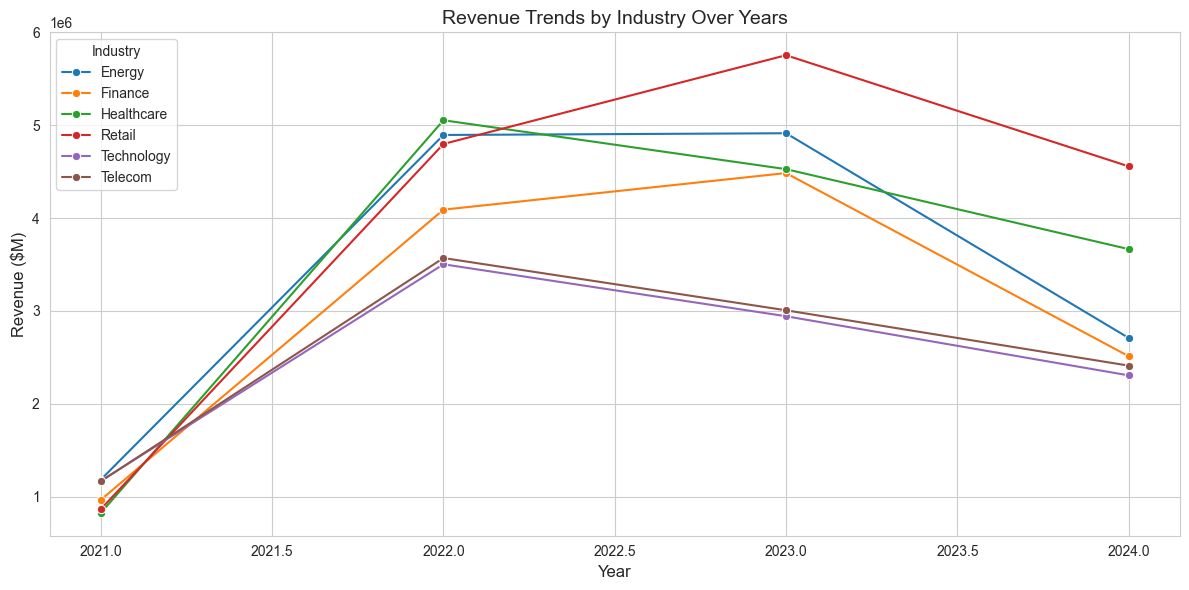

In [20]:
# st1 = pd.merge(df1, df4, on="company_id", how='inner')
# Step 2: Merge df1 and df2 to get revenue data
# Step 4: Merge industry info if not in df2
if 'industry' not in T.columns:
    T = pd.merge(T, df4[['company_id', 'industry']], on='company_id', how='left')
# Step 5: Group by industry and year to calculate total revenue
trend_by_year = T.groupby(["industry", "year"]).agg({"revenue": "sum"}).reset_index()
# Step 6: Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_by_year, x="year", y="revenue", hue="industry", marker="o")
plt.title("Revenue Trends by Industry Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue ($M)", fontsize=12)
plt.legend(title="Industry")
plt.grid(True)
plt.tight_layout()
plt.savefig('chart.png')
plt.show()


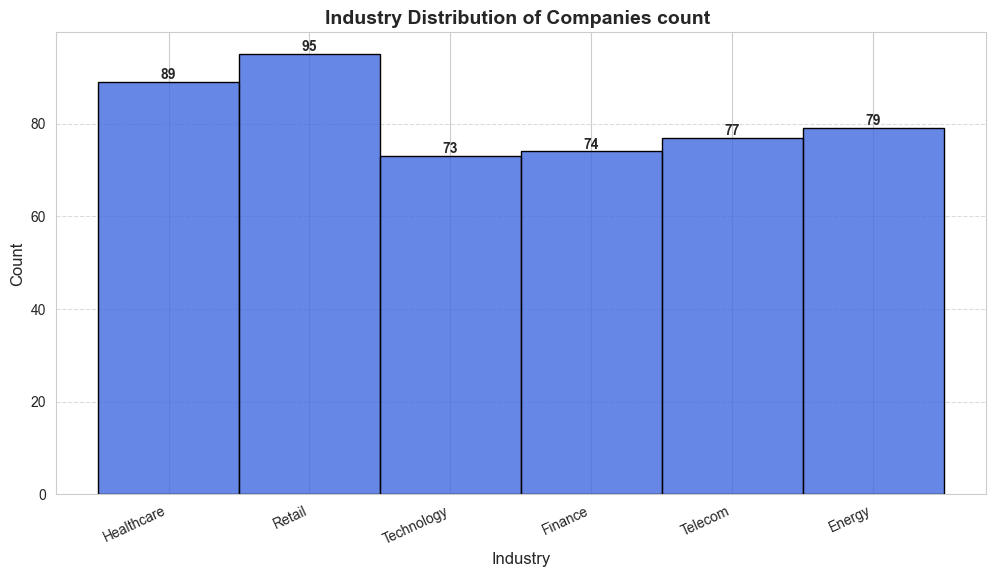

In [21]:
# Merge and sort data
w = df1
# Set figure size
plt.figure(figsize=(12, 6))
# Create an advanced histogram
ax = sns.histplot( data=w, x="industry",color="royalblue", edgecolor="black", alpha=0.8)

# Rotate x-axis labels for readability
plt.xticks(rotation=25, ha="right")
# Add title and labels
plt.title("Industry Distribution of Companies count ", fontsize=14, fontweight="bold")
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Annotate bars with their heights
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, fontweight="bold")
# Show the plot
plt.savefig("chart.png")
plt.show()


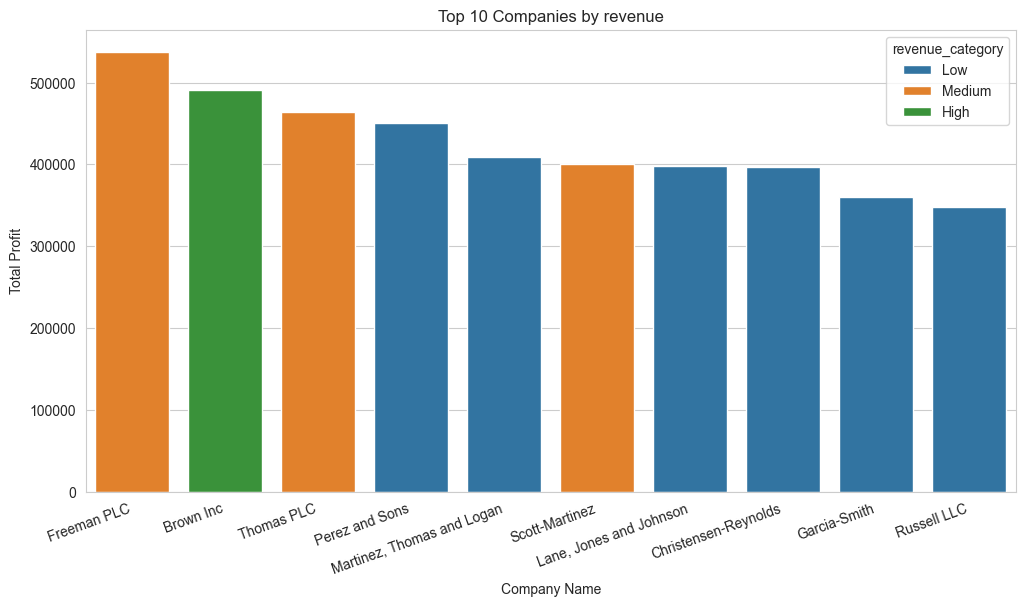

In [22]:
# Aggregate the sum of profit and revenue per company
n = (
    T.groupby("company_name")
    .agg({"profit": "sum", "revenue": "sum"})
    .nlargest(10, "revenue")  # Select top 10 companies by profit
    .reset_index()  # Reset index to keep company_name as a column
)
n
# Create the barplot
plt.figure(figsize=(12,6))
# sb.barplot(data=n, x="company_name", y="profit", palette="Blues")
n["revenue_category"] = pd.cut(n["profit"], bins=3, labels=["Low", "Medium", "High"])
sns.barplot(data=n, x="company_name", y="revenue", hue="revenue_category")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Company Name")
plt.ylabel("Total Profit")
plt.title("Top 10 Companies by revenue")
plt.xticks(rotation=20)
plt.savefig("chart.png")
plt.show()               

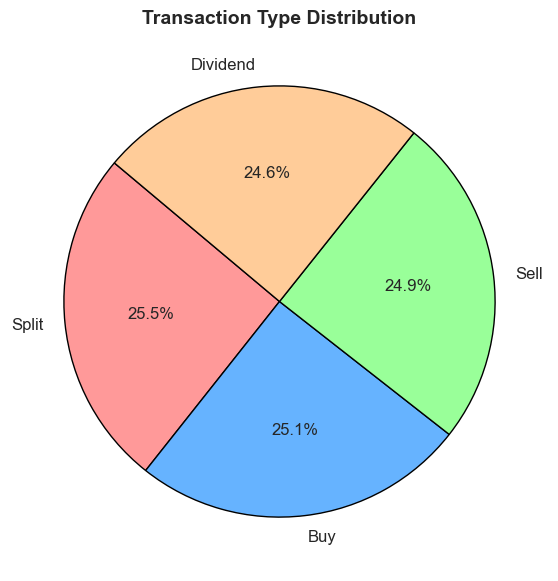

In [23]:
import matplotlib.pyplot as plt
# Count transaction types
df = df3['transaction_type'].value_counts()
# Create pie chart with dynamic labels
plt.figure(figsize=(7, 7))  # Adjust figure size
plt.pie(df, labels=df.index, autopct='%1.1f%%', startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],  # Custom colors
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Border
        textprops={'fontsize': 12})
plt.title("Transaction Type Distribution", fontsize=14, fontweight="bold")
plt.savefig("chart.png")
plt.show()

FINANCIAL PERFORMANCE

C:\Users\HP\AppData\Local\Temp\ipykernel_6064\402592992.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fx.index, rotation=45)


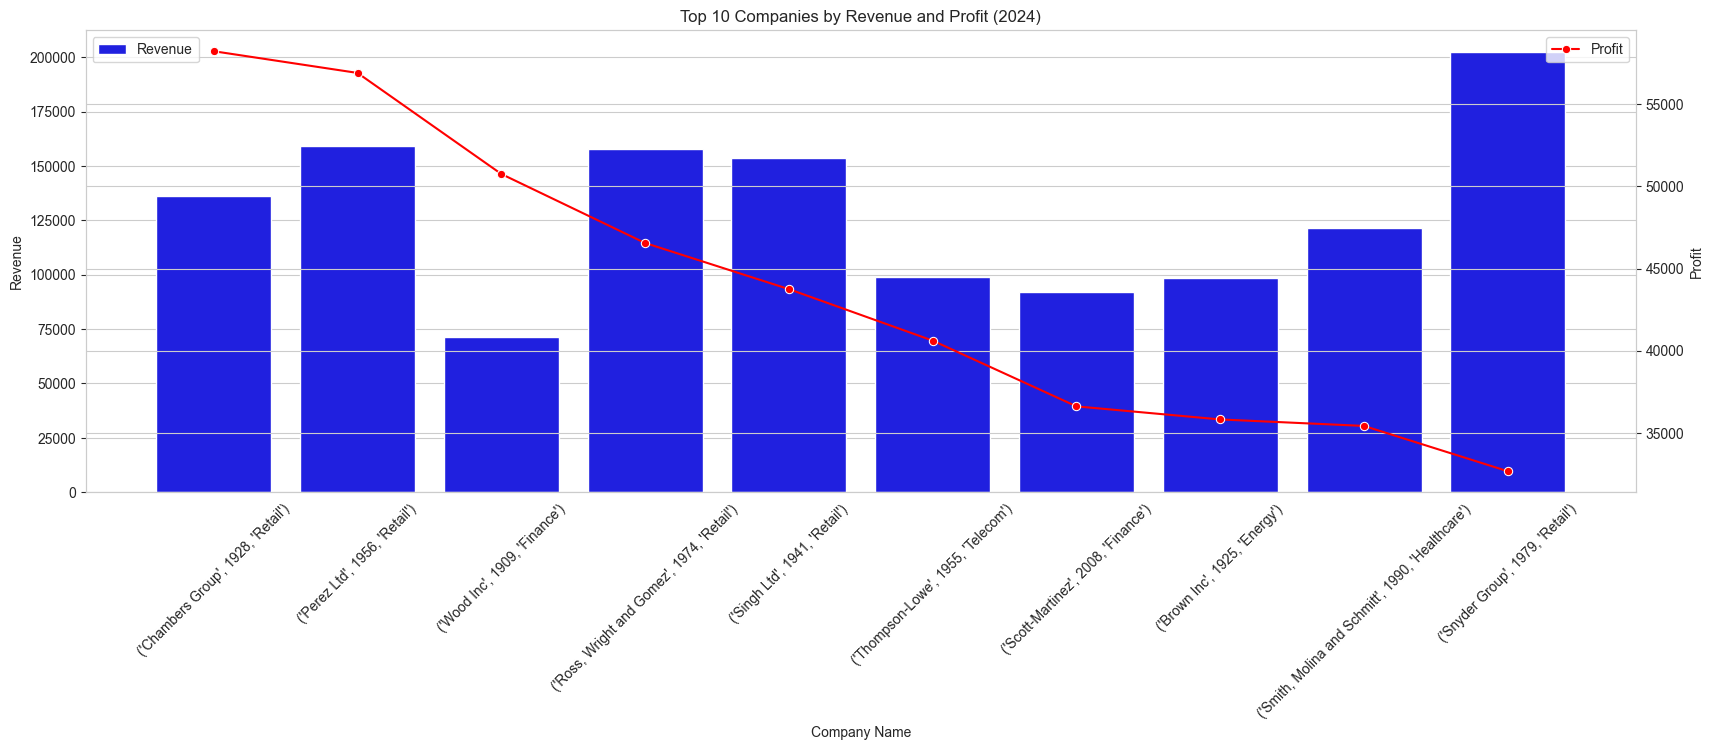

In [24]:
# Merging data
f = T
# Convert date to datetime format
f["date"] = pd.to_datetime(f["date"])                                                    
f["year"] = f["date"].dt.year

# Aggregating data
f = f.groupby(["company_name", "year", "founded_year", "industry"]).agg(
    {"revenue": "sum", "profit": "sum"}
).sort_values("profit", ascending=False)

# Filtering for year 2024 and top 10 companies
fx = f.xs(2024, level="year").head(10)

# Plotting
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=fx, x="company_name", y="revenue", ax=ax, color="blue", label="Revenue")

# Add secondary y-axis for profit
ax2 = ax.twinx()
sns.lineplot(data=fx, x="company_name", y="profit", ax=ax2, color="red", marker="o", label="Profit")
ax.set_ylabel("Revenue")
ax2.set_ylabel("Profit")
ax.set_xlabel("Company Name")
ax.set_xticklabels(fx.index, rotation=45)
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Top 10 Companies by Revenue and Profit (2024)") 
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6064\1731260713.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="industry", y="market_cap", data=grouped, palette=colors)


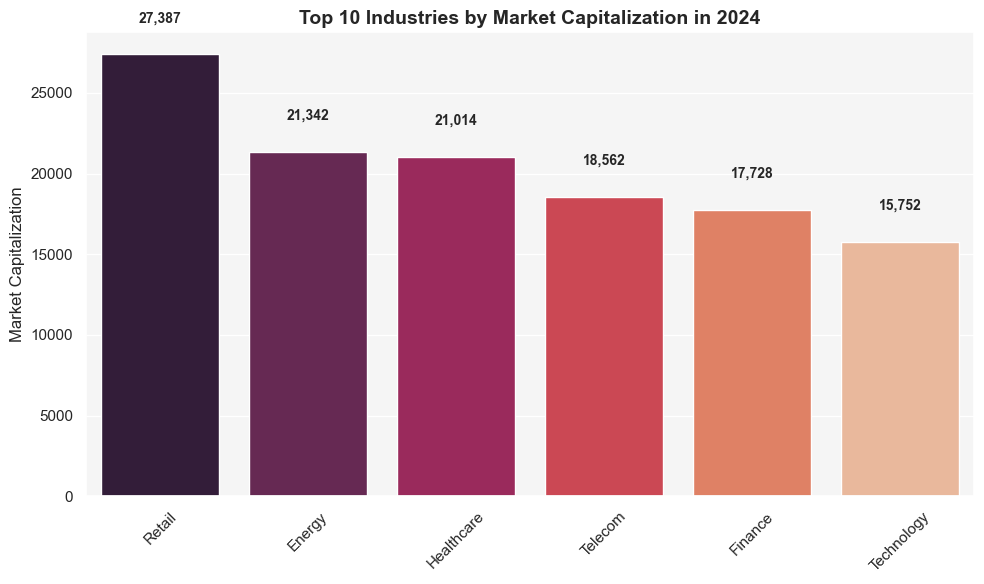

In [25]:
# Group and reset index to make 'industry' a column
grouped = df1.groupby("industry").agg({"market_cap": "sum"}).reset_index()

# Sort and take top 10 (optional)
grouped = grouped.sort_values(by="market_cap", ascending=False).head(10)

# Set style and palette
sns.set(style="darkgrid")
colors = sns.color_palette("rocket", len(grouped))

# Create figure and axis
plt.figure(figsize=(10, 6))
bars = sns.barplot(x="industry", y="market_cap", data=grouped, palette=colors)

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,height + 2000,f'{int(height):,}',ha='center',fontsize=10,weight='bold')

# Set labels and title
plt.title("Top 10 Industries by Market Capitalization in 2024", fontsize=14, weight='bold')
plt.ylabel("Market Capitalization", fontsize=12)
plt.xlabel("")
plt.xticks(rotation=45)

# Optional rounded corner style
plt.gca().set_facecolor('#f5f5f5')
plt.gcf().patch.set_linewidth(0)
plt.gcf().patch.set_edgecolor('none')

# Show
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6064\2969725963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r1, x="country", y="volume", palette=sns.color_palette("Set2"), ax=axes[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_6064\2969725963.py:10: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=r1, x="country", y="volume", palette=sns.color_palette("Set2"), ax=axes[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_6064\2969725963.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r2, x="country", y="company_id", palette=sns.color_palette("Set2"), ax=axes[1])
C:\Users\HP\AppData\Local

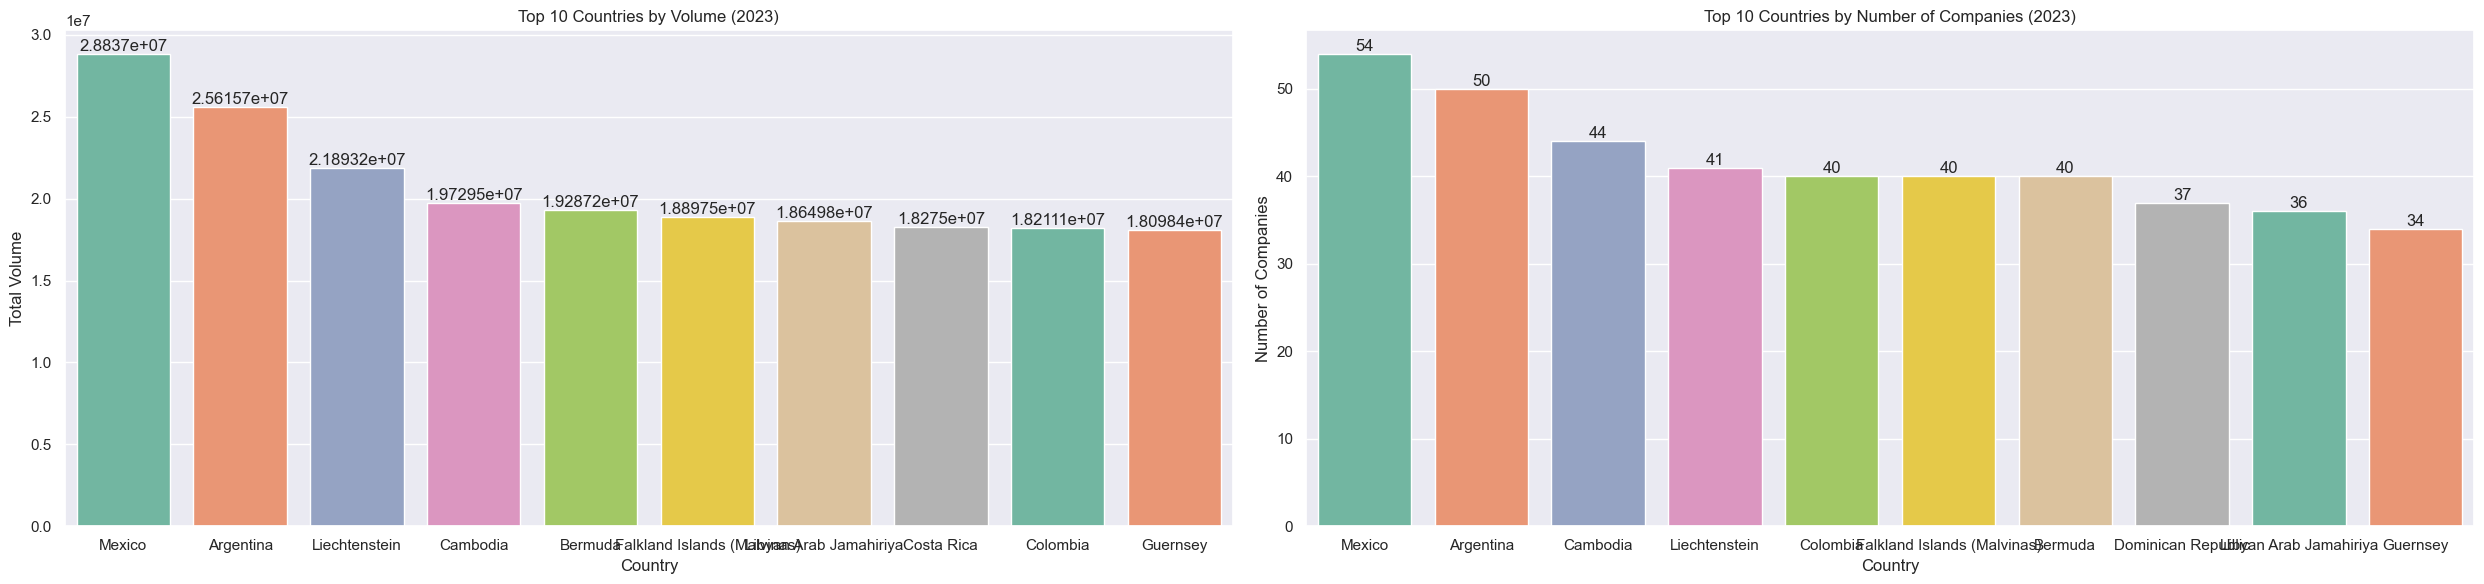

In [ ]:
s=pd.merge(df1, df4, on="company_id")
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
s["date"] = pd.to_datetime(s["date"])
s["year"] = s["date"].dt.year

# First Plot: Volume per Country (Top 10)
r1 = s.groupby(["country", "year"]).agg({"volume": "sum"}).sort_values("volume", ascending=False)
r1 = r1.xs(2023, level="year").head(10).reset_index()

sns.barplot(data=r1, x="country", y="volume", palette=sns.color_palette("Set2"), ax=axes[0])
axes[0].set_title("Top 10 Countries by Volume (2023)")
axes[0].set_ylabel("Total Volume")
axes[0].set_xlabel("Country")

for bars in axes[0].containers:
    axes[0].bar_label(bars)

# Second Plot: Number of Companies per Country (Top 10)
r2 = s.groupby(["country", "year"]).agg({"company_id": "count"}).sort_values("company_id", ascending=False)
r2 = r2.xs(2023, level="year").head(10).reset_index()

sns.barplot(data=r2, x="country", y="company_id", palette=sns.color_palette("Set2"), ax=axes[1])
axes[1].set_title("Top 10 Countries by Number of Companies (2023)")
axes[1].set_ylabel("Number of Companies")
axes[1].set_xlabel("Country")

for bars in axes[1].containers:
    axes[1].bar_label(bars)
plt.tight_layout()
plt.show()


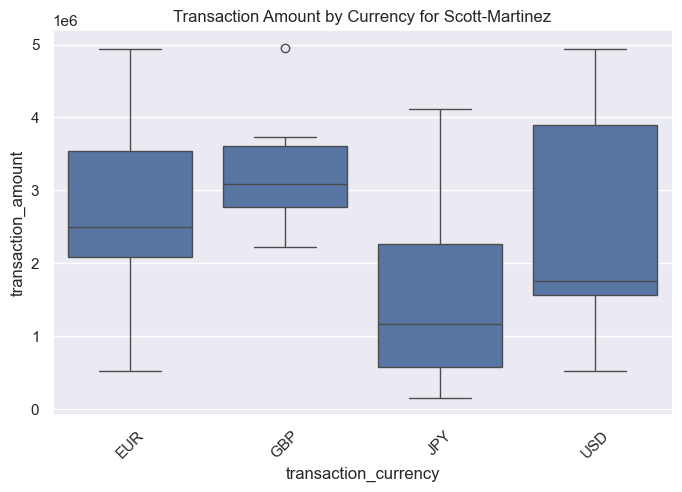

In [ ]:
# # Merge with specified key
q = pd.merge(df1, df3, on="company_id")  # Replace with the correct key

# Filter transactions for "Scott-Martinez"
d = q.loc[q["company_name"] == "Scott-Martinez"]

# Group by transaction currency and sum transaction amounts
k = d.groupby("transaction_currency").agg({"transaction_amount": "sum"}).reset_index()
# k.nlargest(3,"transaction_amount")
# Plot using stripplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=d, x="transaction_currency", y="transaction_amount")

# sb.stripplot(data=k, x="transaction_currency", y="transaction_amount", jitter=True)
plt.xticks(rotation=45)
plt.title("Transaction Amount by Currency for Scott-Martinez")
plt.show()


Correlation Coefficient: 0.929
P-value: 0.00010


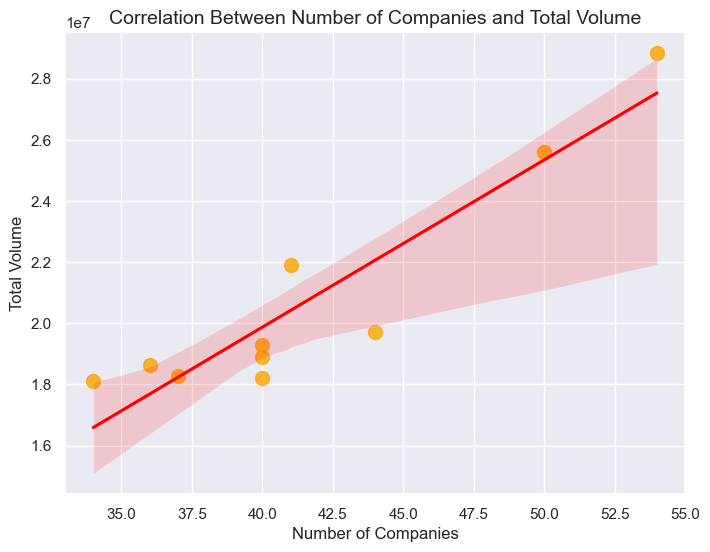

In [28]:
from scipy import stats
# Data from charts
volume = np.array([28837000, 25615700, 21893200, 19729500, 19287200, 18897500, 18649800, 18275000, 18211100, 18098400])
companies = np.array([54, 50, 41, 44, 40, 40, 36, 37, 40, 34])

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(volume, companies)
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.5f}")

# Create scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x=companies, y=volume, scatter_kws={"s":100, "color":"orange"}, line_kws={"color":"red"})

# Labels and title
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Total Volume", fontsize=12)
plt.title("Correlation Between Number of Companies and Total Volume", fontsize=14)
plt.grid(True)
plt.savefig("chart.png")
# Show plot
plt.show()                                    


Market Trends & Predictions 

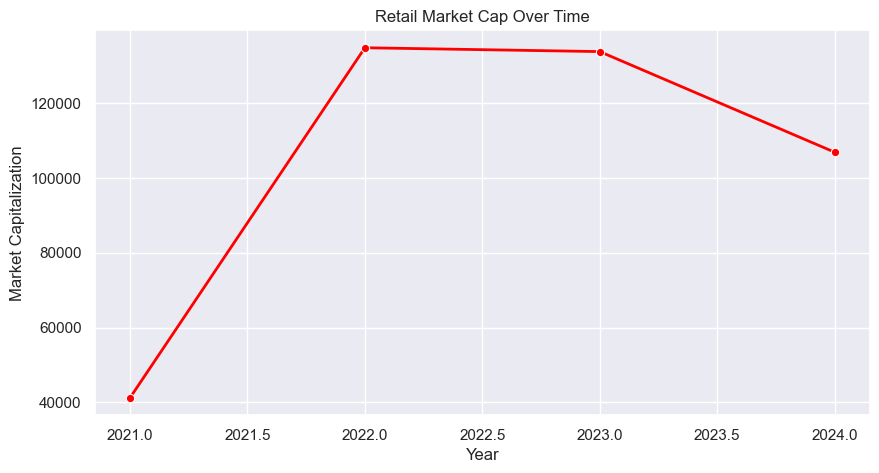

In [29]:
# Merge and preprocess data
y = pd.merge(df1, df4, on="company_id")                                           
y["date"] = pd.to_datetime(y["date"])              
y["year"] = y["date"].dt.year                                                                                    
y = y.groupby(["industry", "year"]).agg({"market_cap": "sum"}).reset_index()

# Filter for 2024 and get top 10 industries
yx = y[y["year"] == 2024].sort_values("market_cap", ascending=False).head(10)

# Industry Trend Over Time (Line Chart)
plt.figure(figsize=(10,5))
sns.lineplot(data=y[y["industry"] == "Healthcare"], x="year", y="market_cap", marker="o", color="red", linewidth=2)
plt.title("Retail Market Cap Over Time")
plt.xlabel("Year")
plt.ylabel("Market Capitalization")
plt.grid(True)
plt.savefig("chart.png")
plt.show()               


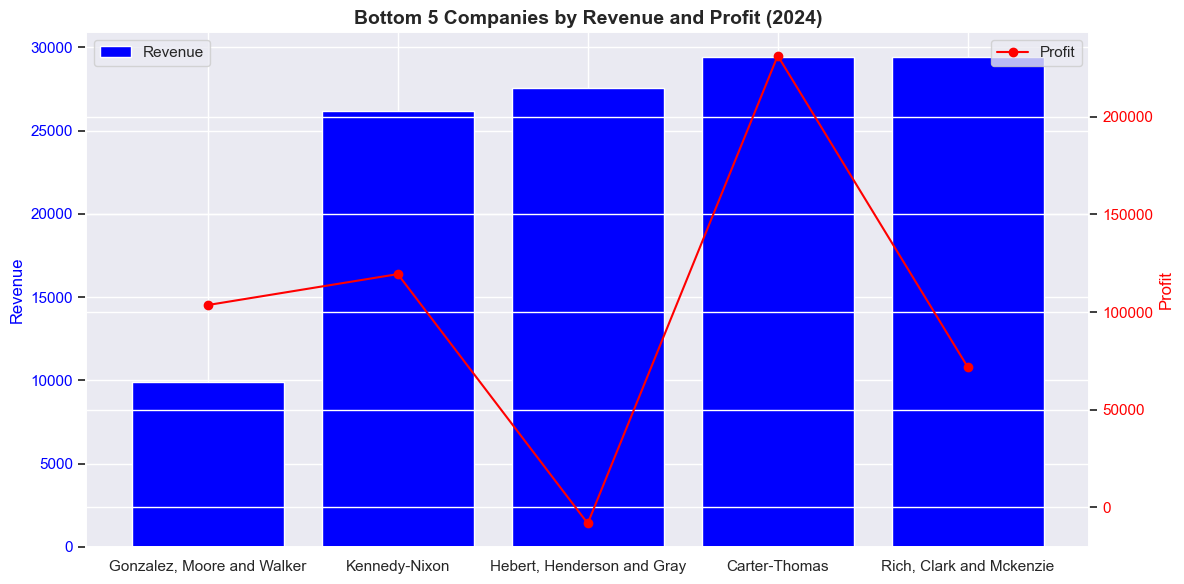

In [30]:
# Merge data
C = pd.merge(T, df3, on="company_id")
# Filter for year 2024
C_2024 = C[C["year"] == 2024]

# Group and sort by revenue (bottom 5 companies by revenue)
f = C_2024.groupby(["company_name"]).agg({"revenue": "sum", "profit": "sum"}).sort_values("revenue", ascending=True).head(5).reset_index()

# If company_name is a tuple, convert it to string for display
f["company_name"] = f["company_name"].apply(lambda x: ' - '.join(map(str, x)) if isinstance(x, tuple) else str(x))

# Extract values for plotting
companies = f["company_name"]
revenue = f["revenue"]
profit = f["profit"]

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot revenue as bars
bars = ax1.bar(companies, revenue, color='blue', label='Revenue')
ax1.set_ylabel("Revenue", fontsize=12, color="blue")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc="upper left")

# Plot profit as line on second axis
ax2 = ax1.twinx()
ax2.plot(companies, profit, color='red', marker='o', linestyle='-', label='Profit')
ax2.set_ylabel("Profit", fontsize=12, color="red")
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc="upper right")

# Formatting
plt.title("Bottom 5 Companies by Revenue and Profit (2024)", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


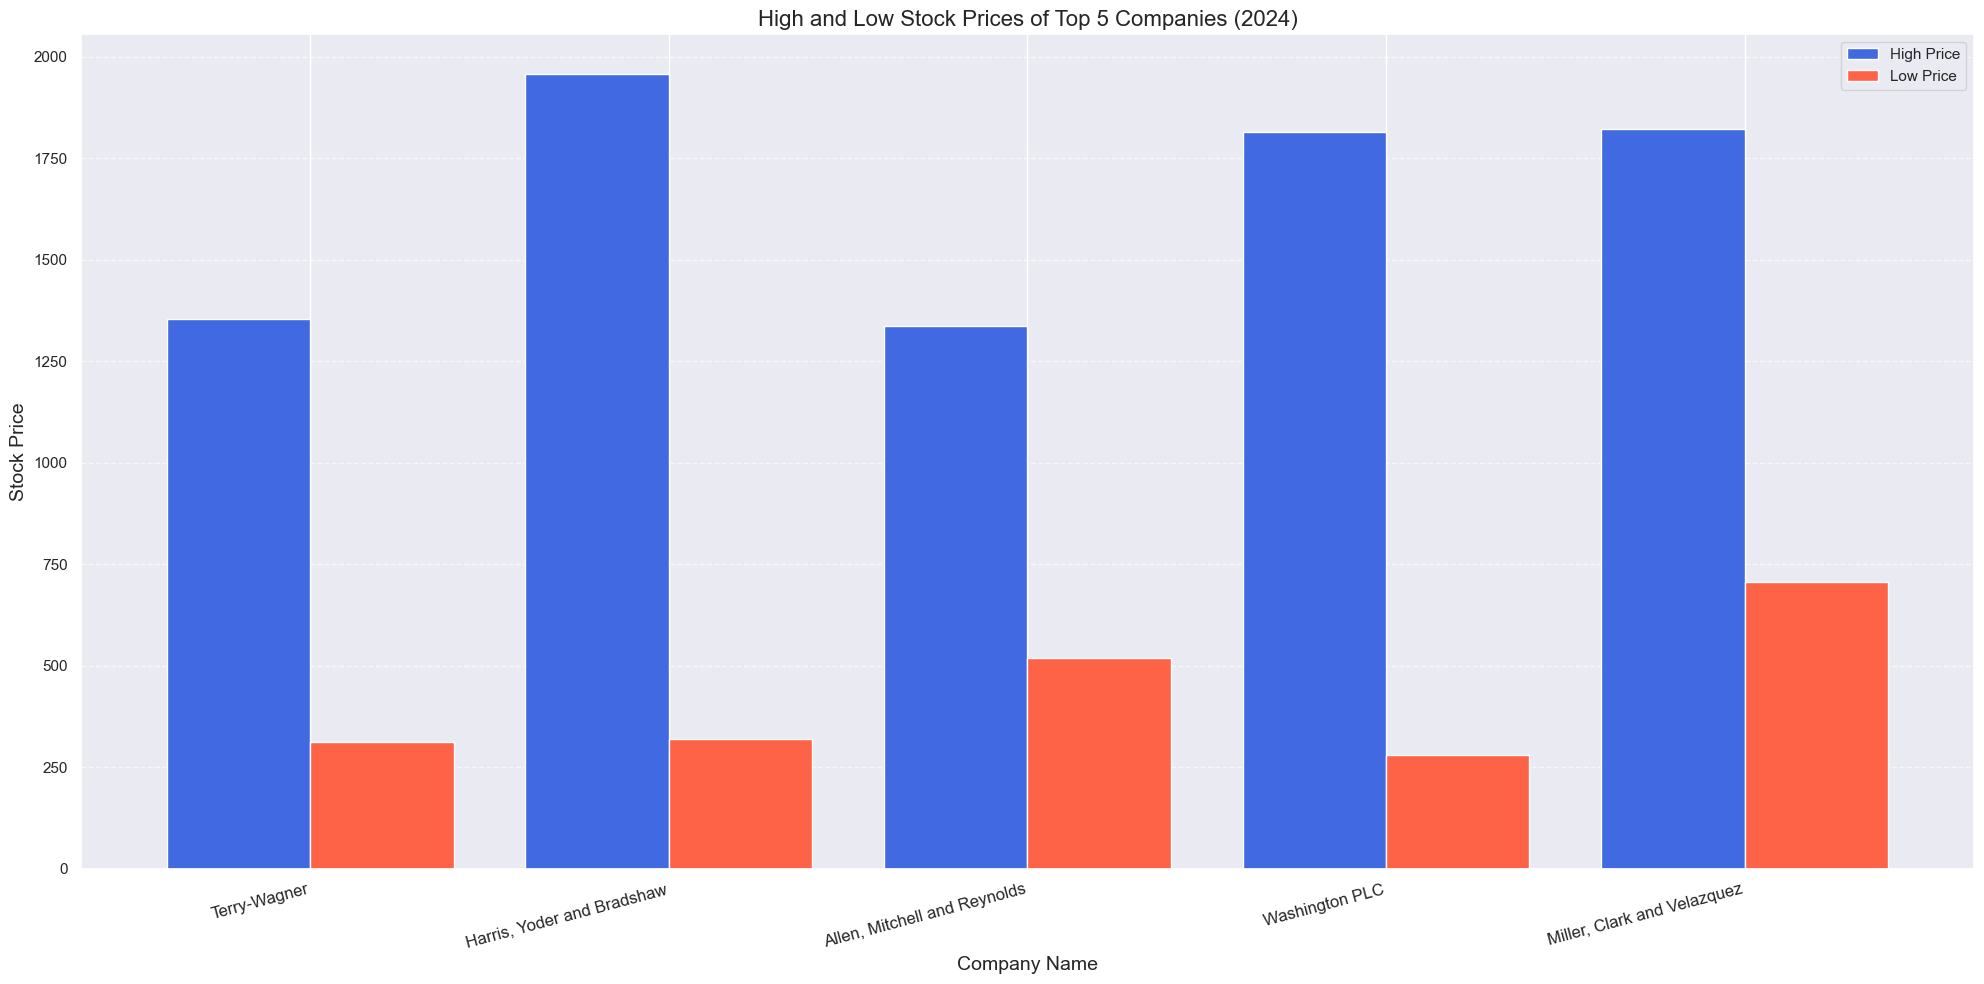

In [31]:

# Step 1: Convert date and extract year
s["date"] = pd.to_datetime(s["date"])
s["year"] = s["date"].dt.year

# Step 2: Group and aggregate
tr = s.groupby(["company_name", "year", "volume"]).agg({
    "high_price": "max",
    "low_price": "max"
}).sort_values("volume", ascending=False)

# Step 3: Filter for 2024 data
tr_2024 = tr.xs(2024, level="year")

# Step 4: Get top 5 by volume
v = tr_2024.head(5).reset_index()
# Step 5: Plotting
plt.figure(figsize=(20, 10))

bar_width = 0.4
x = range(len(v["company_name"]))

# Plot High Prices
plt.bar(x, v["high_price"], width=bar_width, label="High Price", color="royalblue")

# Plot Low Prices (shifted on x-axis)
plt.bar([i + bar_width for i in x], v["low_price"], width=bar_width, label="Low Price", color="tomato")

# X-axis labels and styling
plt.xticks([i + bar_width / 2 for i in x], v["company_name"], rotation=15, ha="right", fontsize=12)
plt.xlabel("Company Name", fontsize=14)
plt.ylabel("Stock Price", fontsize=14)
plt.title("High and Low Stock Prices of Top 5 Companies (2024)", fontsize=16)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Save or display
plt.savefig("q3_stock_prices_2024.png")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6064\3695863196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_companies, x="profit", y=top_companies.index, palette="magma", edgecolor="black", linewidth=1.5)


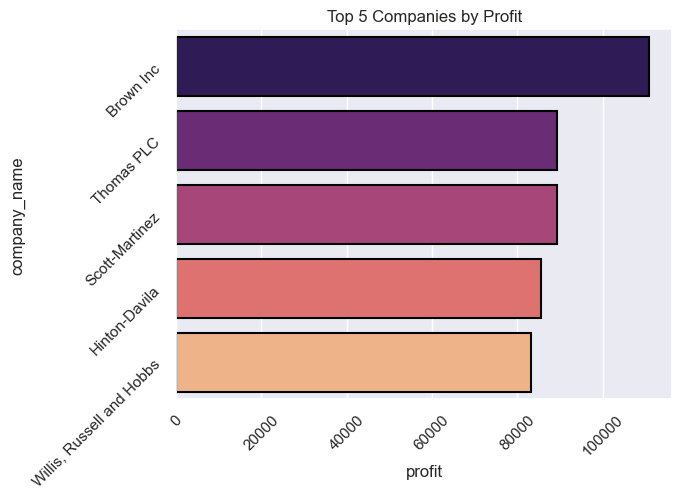

In [32]:
# Top 5 profitable companies
top_companies = T.groupby(["company_name"]).agg({"profit": "sum"}).nlargest(5, "profit")

# Barplot for top 5 companies
sns.barplot(data=top_companies, x="profit", y=top_companies.index, palette="magma", edgecolor="black", linewidth=1.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Top 5 Companies by Profit")
plt.savefig("chart.png")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6064\318176243.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_companies,x="company_name", y="profit",hue="industry",palette="coolwarm",edgecolor="black",linewidth=1.5, ci=None)


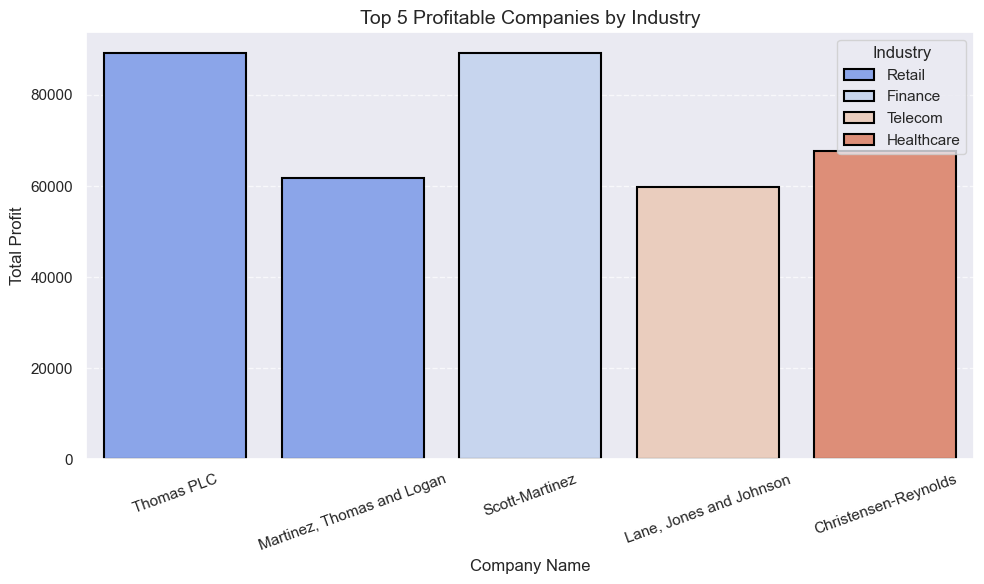

In [33]:
# Step 1: Group by industry and company, summing revenue and profit
grouped = T.groupby(["industry", "company_name"]).agg({"revenue": "sum","profit": "sum"}).reset_index()
# Step 2: Get top 6 companies based on total revenue
top_companies = grouped.nlargest(5, "revenue")
# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_companies,x="company_name", y="profit",hue="industry",palette="coolwarm",edgecolor="black",linewidth=1.5, ci=None)

# Step 4: Add chart elements
plt.title("Top 5 Profitable Companies by Industry", fontsize=14)
plt.xlabel("Company Name", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Industry")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
# Step 5: Save and Show
plt.savefig('chart.png')
plt.show()


INVESTMENT INSIGHTS

1.Freeman PLC : This company is operating in two industry in 1954 Energy(Libyan Arab Jamahiriya) and 2001 Telecom (Cambodia). The data spans from 2021 to 2024 and includes revenue, profit, and earnings per share (EPS) figures. Key observations include.

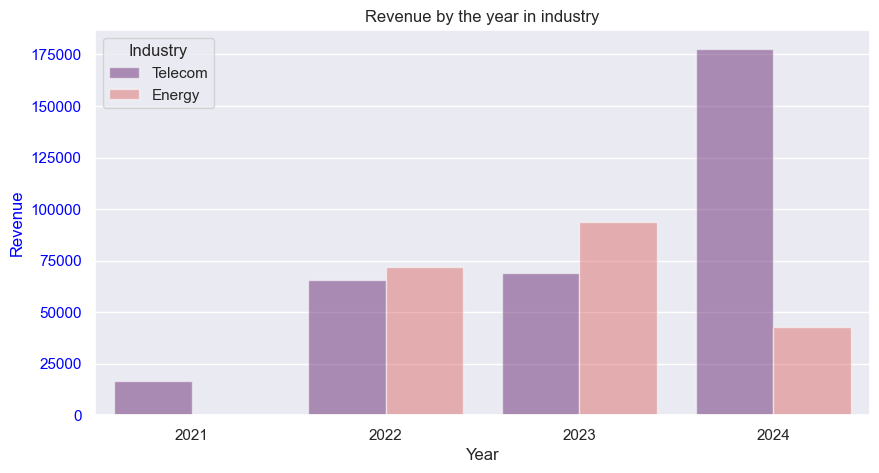

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

x= T.loc[T["company_name"] == "Freeman PLC"]
f=x.groupby(["year","industry"]).agg({"revenue":"sum","profit":"sum"})
# Reset index for plotting
f = f.reset_index()
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))
# Bar plot for revenue (left axis)
sns.barplot(data=f, x="year", y="revenue", hue="industry", ax=ax1, alpha=0.5,palette="magma")
ax1.set_ylabel("Revenue", color="blue")
ax1.set_xlabel("Year")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(title="Industry", loc="upper left")
plt.title("Revenue by the year in industry")
plt.savefig("chart.png")
plt.show()


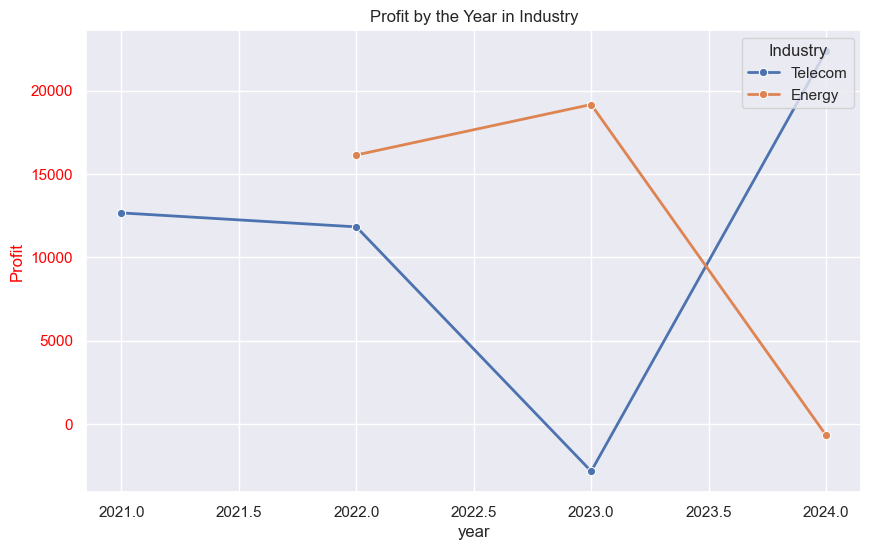

In [35]:
fig, ax2 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=f, x="year", y="profit", hue="industry", marker="o", ax=ax2, linewidth=2)

ax2.set_ylabel("Profit", color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax2.legend(title="Industry", loc="upper right")  # Fix legend

plt.title("Profit by the Year in Industry")  # Fix title
plt.savefig("chart.png")                                                   #complete 10
plt.show()


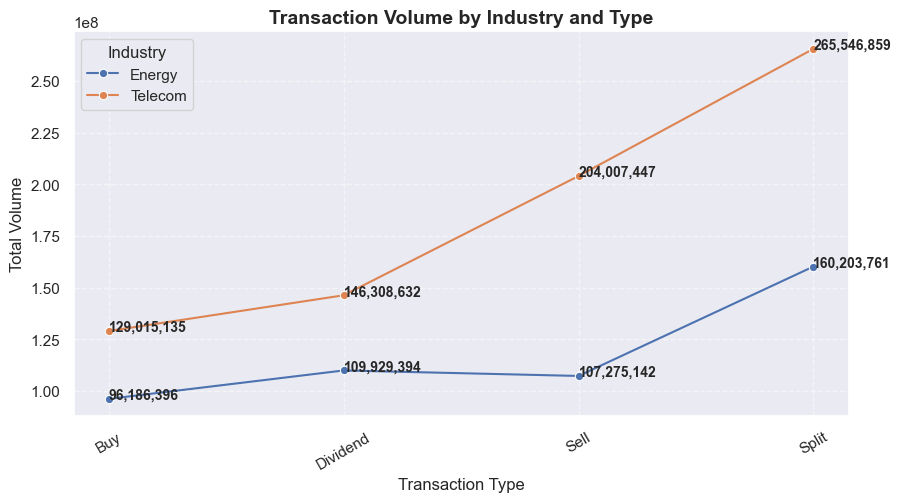

In [36]:
D=pd.merge(df1, df3, on="company_id")
D=pd.merge(D,df4,on="company_id")
D["date"] = pd.to_datetime(D["transaction_date"])                                                    
D["year"] = D["date"].dt.year
# Filter data
x = D.loc[D["company_name"] == "Freeman PLC"]

# Group and aggregate data
x = x.groupby(["transaction_type", "industry"], as_index=False).agg({"transaction_amount": "sum"})

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=x, x="transaction_type", y="transaction_amount", hue="industry", marker="o")

# Add labels to points
for index, row in x.iterrows():
    plt.text(row["transaction_type"], row["transaction_amount"], f'{int(row["transaction_amount"]):,}', 
             horizontalalignment='right' if row["industry"] == "Retail" else 'left', 
             fontsize=10, weight='bold')

# Customize appearance
plt.title("Transaction Volume by Industry and Type", fontsize=14, weight='bold')
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Total Volume", fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Industry")
plt.savefig("chart.png")
plt.show()


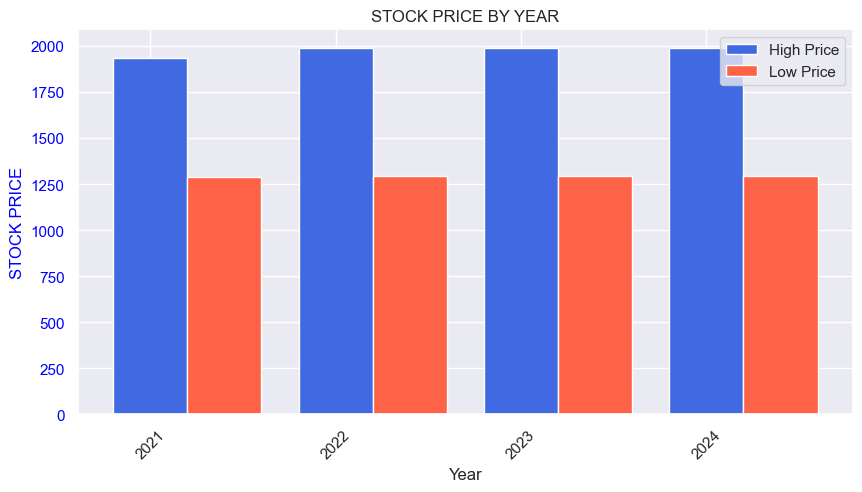

In [37]:
# Assuming 'C' is a DataFrame
x = D.loc[D["company_name"] == "Freeman PLC"]

# Aggregating data
tr = x.groupby(["year"]).agg({"high_price": "max", "low_price": "max"}).reset_index()
# f = x.groupby(["year", "industry"]).agg({"revenue": "sum", "profit": "sum"}).reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for revenue (left axis)
bar_width = 0.4  # Define a width for bars
x_values = range(len(tr["year"]))  # Corrected from undefined 'v'

plt.bar(x_values, tr["high_price"], width=bar_width, label="High Price", color="royalblue")
plt.bar([i + bar_width for i in x_values], tr["low_price"], width=bar_width, label="Low Price", color="tomato")

ax1.set_ylabel("STOCK PRICE", color="blue")
ax1.set_xlabel("Year")
ax1.set_xticks(x_values)  # Ensure x-ticks align correctly
ax1.set_xticklabels(tr["year"].astype(str), rotation=45)
ax1.tick_params(axis="y", labelcolor="blue")

plt.legend()
plt.title("STOCK PRICE BY YEAR")
plt.savefig("chart.png")
plt.show()


Business Model:-  This company is experiencing good revenue growth each year, but the profit growth is not as satisfying when compared to the trend. For investors, the Telecom industry can be a good option for long-term investment.Top 10 country with volume and there count of companies

2.Brown Inc : This company operating in different industries and locations. in 1925 Energy (Mozambique) and 1994 Healthcare  (Suriname). The data spans from 2021 to 2024 and includes revenue, profit, and earnings per share (EPS) figures. Key observations include

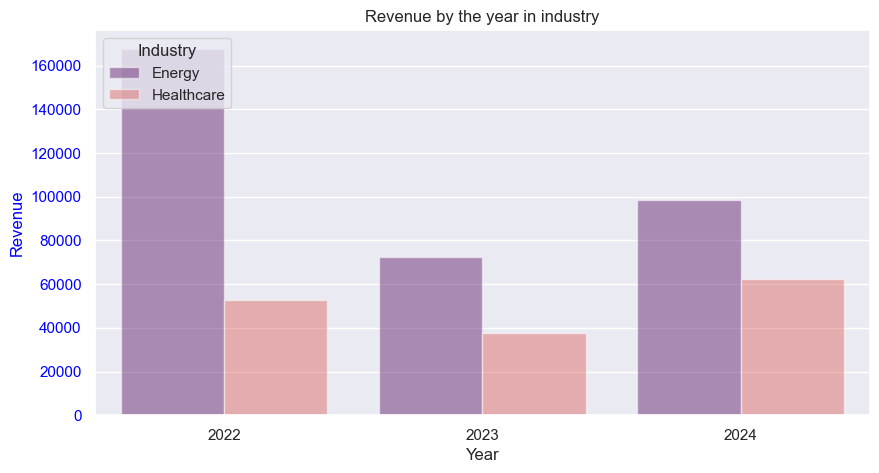

In [38]:
x= T.loc[T["company_name"] == "Brown Inc"]
f=x.groupby(["year","industry"]).agg({"revenue":"sum","profit":"sum"})

f = f.reset_index()
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))
# Bar plot for revenue (left axis)
sns.barplot(data=f, x="year", y="revenue", hue="industry", ax=ax1, alpha=0.5,palette="magma")
ax1.set_ylabel("Revenue", color="blue")
ax1.set_xlabel("Year")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(title="Industry", loc="upper left")
plt.title("Revenue by the year in industry")
plt.savefig("chart.png")
plt.show()


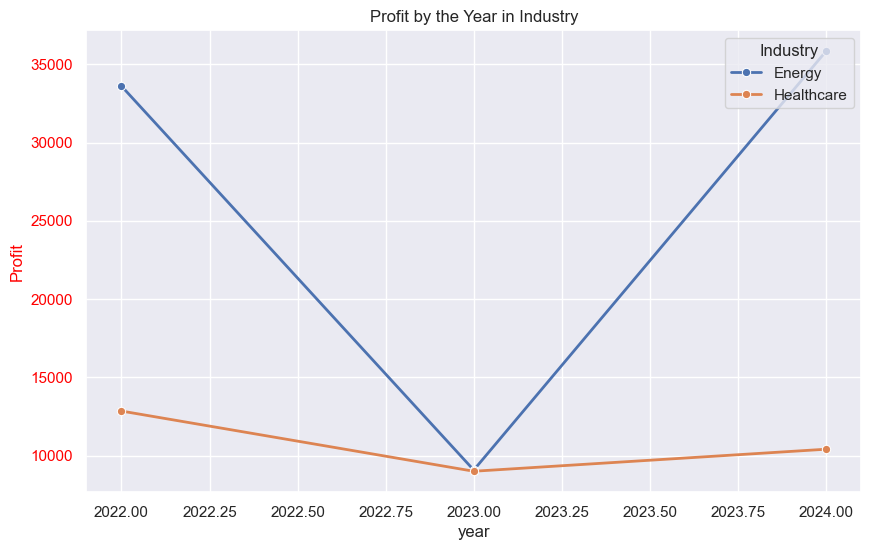

In [39]:
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=f, x="year", y="profit", hue="industry", marker="o", linewidth=2)
ax2.set_ylabel("Profit", color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax2.legend(title="Industry", loc="upper right")  # Fix legend

plt.title("Profit by the Year in Industry")  # Fix title
plt.savefig("chart.png")                                                  
plt.show()

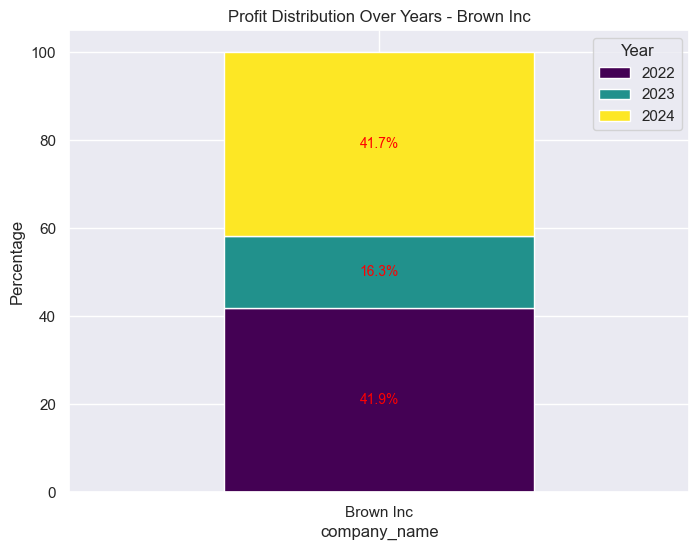

In [40]:
# Filter data for "Brown Inc"
T["date"] = pd.to_datetime(T["date"])  # Ensure datetime format
x = T.loc[T["company_name"] == "Brown Inc"].copy()  # Avoid SettingWithCopyWarning
x["year"] = x["date"].dt.year

# Grouping profit by year for "Brown Inc"
tra = x.groupby(["company_name", "year"]).agg({"profit": "sum"}).reset_index()

# Barplot for yearly profit trend
# sb.barplot(data=tra, x="year", y="profit")
# plt.title("Yearly Profit Trend - Brown Inc")
# plt.show()

# Pivot table for stacked bar chart
pivot_data = tra.pivot(index="company_name", columns="year", values="profit").fillna(0)
percentages = pivot_data.divide(pivot_data.sum(axis=1), axis=0) * 100

# # Plot stacked bar chart
ax = percentages.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="viridis")

# Add percentage labels
for i, company in enumerate(percentages.index):
    cumulative = 0
    for year in percentages.columns:
        percent = percentages.loc[company, year]
        if percent > 0:
            ax.text(i, cumulative + percent / 2, f"{percent:.1f}%", 
                    ha="center", va="center", color="red", fontsize=10)
        cumulative += percent

plt.title("Profit Distribution Over Years - Brown Inc")
plt.xticks(rotation=0)
plt.ylabel("Percentage")
plt.legend(title="Year")
plt.savefig("chart.png")
plt.show()




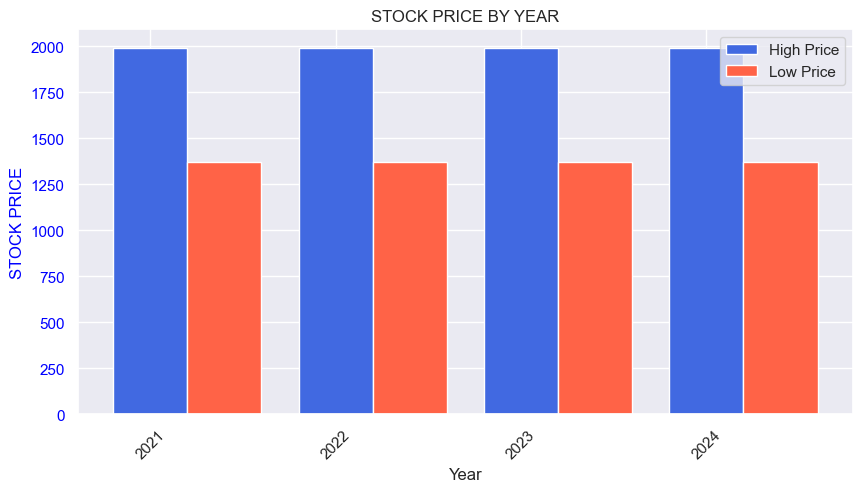

In [41]:
# Assuming 'C' is a DataFrame
x = D.loc[D["company_name"] == "Brown Inc"]

# Aggregating data
tr = x.groupby(["year"]).agg({"high_price": "max", "low_price": "max"}).reset_index()
# f = x.groupby(["year", "industry"]).agg({"revenue": "sum", "profit": "sum"}).reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for revenue (left axis)
bar_width = 0.4  # Define a width for bars
x_values = range(len(tr["year"]))  # Corrected from undefined 'v'

plt.bar(x_values, tr["high_price"], width=bar_width, label="High Price", color="royalblue")
plt.bar([i + bar_width for i in x_values], tr["low_price"], width=bar_width, label="Low Price", color="tomato")

ax1.set_ylabel("STOCK PRICE", color="blue")
ax1.set_xlabel("Year")
ax1.set_xticks(x_values)  # Ensure x-ticks align correctly
ax1.set_xticklabels(tr["year"].astype(str), rotation=45)
ax1.tick_params(axis="y", labelcolor="blue")

plt.legend()
plt.title("STOCK PRICE BY YEAR")
plt.savefig("chart.png")
plt.show()


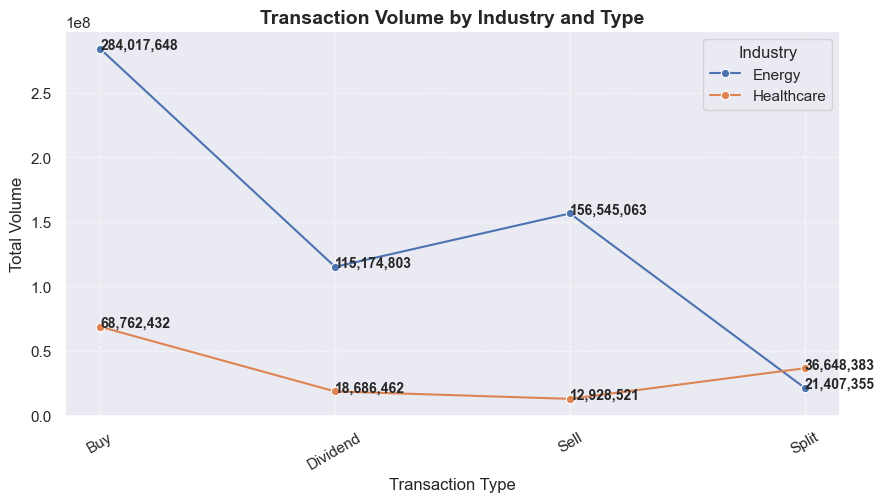

In [42]:
# Filter data
x = C.loc[C["company_name"] == "Brown Inc"]

# Group and aggregate data
x = x.groupby(["transaction_type", "industry"], as_index=False).agg({"transaction_amount": "sum"})

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=x, x="transaction_type", y="transaction_amount", hue="industry", marker="o")

# Add labels to points
for index, row in x.iterrows():
    plt.text(row["transaction_type"], row["transaction_amount"], f'{int(row["transaction_amount"]):,}', 
             horizontalalignment='right' if row["industry"] == "Retail" else 'left', 
             fontsize=10, weight='bold')

# Customize appearance
plt.title("Transaction Volume by Industry and Type", fontsize=14, weight='bold')
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Total Volume", fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Industry")
plt.savefig("chart.png")
plt.show()


Business Model:-  This company is experiencing good profit growth each year, but the revenue growth is not as satisfying when compared to the trend. For investors, the ENERGY industry can be a good option for investing to get more profit .

3.Scott-Martinez  : This company is a finance company based in Mexico 2008. The data spans from 2021 to 2024 and includes revenue, profit, and earnings per share (EPS) figures. Key observations include.

C:\Users\HP\AppData\Local\Temp\ipykernel_6064\2838617067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=f, x="year", y="revenue", alpha=0.5,palette="magma")


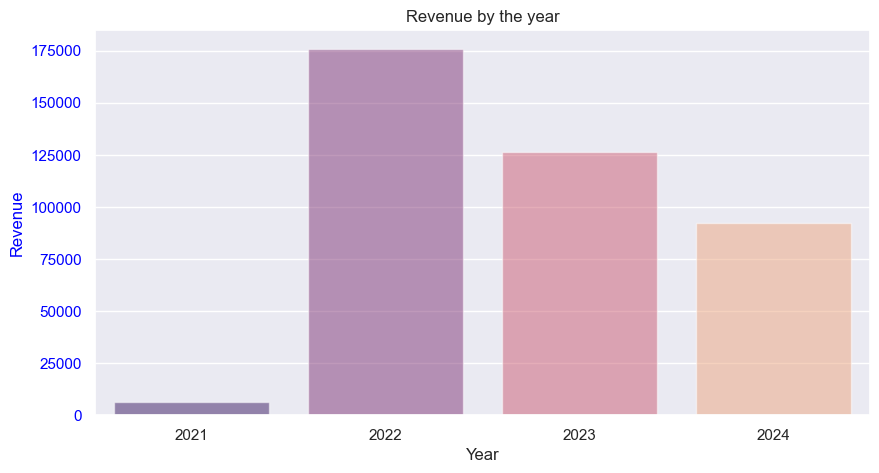

In [43]:
x= T.loc[T["company_name"] == "Scott-Martinez"]
f=x.groupby(["year","industry"]).agg({"revenue":"sum","profit":"sum"})
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))
# Bar plot for revenue (left axis)
sns.barplot(data=f, x="year", y="revenue", alpha=0.5,palette="magma")
ax1.set_ylabel("Revenue", color="blue")
ax1.set_xlabel("Year")
ax1.tick_params(axis="y", labelcolor="blue")
plt.title("Revenue by the year")
plt.savefig("chart.png")
plt.show()

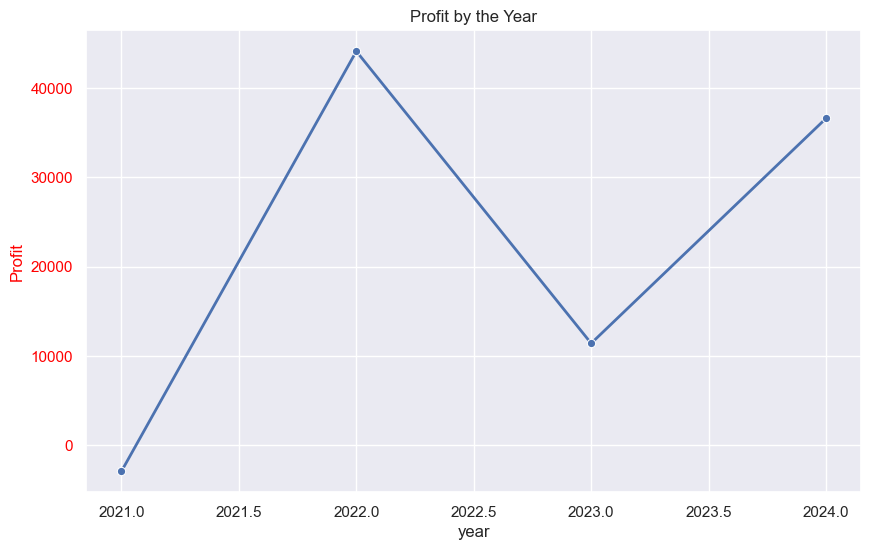

In [44]:
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=f, x="year", y="profit", marker="o", linewidth=2)
ax2.set_ylabel("Profit", color="red")
ax2.tick_params(axis="y", labelcolor="red")
plt.title("Profit by the Year")  # Fix title
plt.savefig("chart.png")                                                  
plt.show()

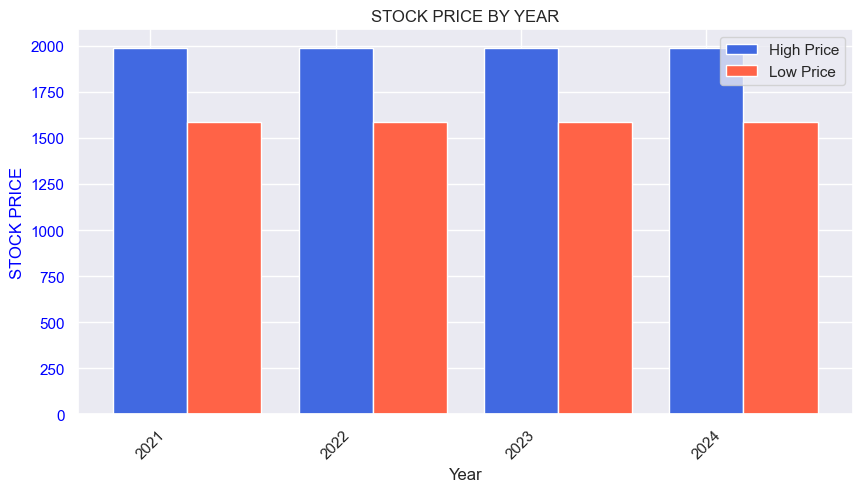

In [45]:
# Assuming 'C' is a DataFrame
x = D.loc[D["company_name"] == "Scott-Martinez"]

# Aggregating data
tr = x.groupby(["year"]).agg({"high_price": "max", "low_price": "max"}).reset_index()
# f = x.groupby(["year", "industry"]).agg({"revenue": "sum", "profit": "sum"}).reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for revenue (left axis)
bar_width = 0.4  # Define a width for bars
x_values = range(len(tr["year"]))  # Corrected from undefined 'v'

plt.bar(x_values, tr["high_price"], width=bar_width, label="High Price", color="royalblue")
plt.bar([i + bar_width for i in x_values], tr["low_price"], width=bar_width, label="Low Price", color="tomato")

ax1.set_ylabel("STOCK PRICE", color="blue")
ax1.set_xlabel("Year")
ax1.set_xticks(x_values)  # Ensure x-ticks align correctly
ax1.set_xticklabels(tr["year"].astype(str), rotation=45)
ax1.tick_params(axis="y", labelcolor="blue")

plt.legend()
plt.title("STOCK PRICE BY YEAR")
plt.savefig("chart.png")
plt.show()


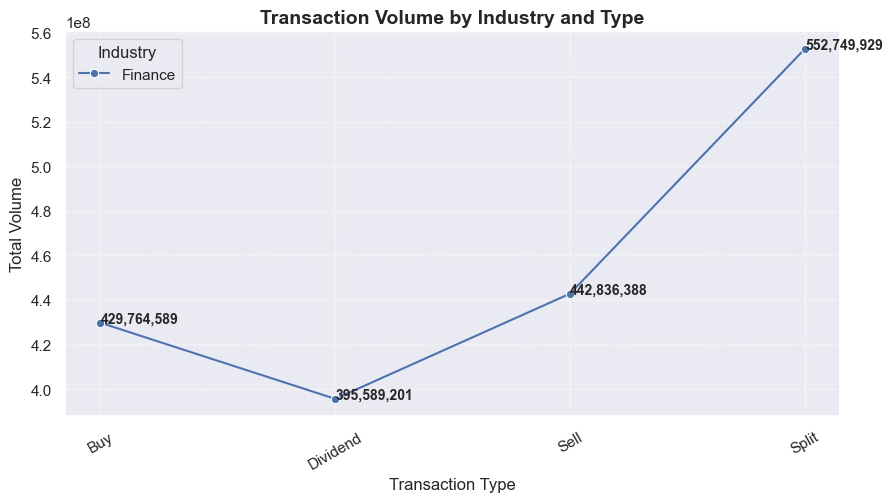

In [46]:
# Filter data
x = C.loc[C["company_name"] == "Scott-Martinez"]

# Group and aggregate data
x = x.groupby(["transaction_type", "industry"], as_index=False).agg({"transaction_amount": "sum"})

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=x, x="transaction_type", y="transaction_amount", hue="industry", marker="o")

# Add labels to points
for index, row in x.iterrows():
    plt.text(row["transaction_type"], row["transaction_amount"], f'{int(row["transaction_amount"]):,}', 
             horizontalalignment='right' if row["industry"] == "Retail" else 'left', 
             fontsize=10, weight='bold')

# Customize appearance
plt.title("Transaction Volume by Industry and Type", fontsize=14, weight='bold')
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Total Volume", fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Industry")
plt.savefig("chart.png")
plt.show()


<h2 style="background: linear-gradient(135deg,rgb(148, 220, 109),rgb(20, 184, 33)); color:white; padding:15px; text-align:center; border-radius:15px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.4);">
   Conlusion
</h2>

<h2 style="background:gold; color:black; padding:15px; text-align:center; border-radius:15px; box-shadow: 0px 4px 12px rgba(154, 20, 20, 0.4);">
   Business Model:- This company is showing good revenue growth each year, and profit
growth is less satisfying when compared to the trend. This is mainly because, as investors, it's
good for growth with corapany profit. It's good for no risk with long-term, with mostly profit.
</h2>
